In [1]:
# some info about GPU
!nvidia-smi

Wed Jun 28 13:51:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [41]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import os

print(os.listdir("/content/drive/MyDrive/Machine learning/Data_Sets/brain_tumor_dataset"))



['no', 'yes']


In [4]:
# path of directory
img_dir = "/content/drive/MyDrive/Machine learning/Data_Sets/brain_tumor_dataset"

In [5]:
# os.listdir(f"{img_dir}")
os.listdir(img_dir)


['no', 'yes']

In [7]:
batch_size = 32
img_height, img_width = 120, 120

In [12]:
# load training data set
train_data = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'binary',
    validation_split = 0.2,
    subset = 'training',
    seed = 2,
    image_size = (img_height, img_width),
    interpolation = 'nearest',
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [29]:
# load validation data set
validation_data = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    labels = 'inferred',
    label_mode = 'binary',
    validation_split = 0.2,
    subset = 'validation',
    seed = 2,
    image_size = (img_height, img_width),
    interpolation = 'nearest',
    batch_size = batch_size
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [35]:
# print labels/ categories in data set
class_name = train_data.class_names
print(class_name)

['no', 'yes']


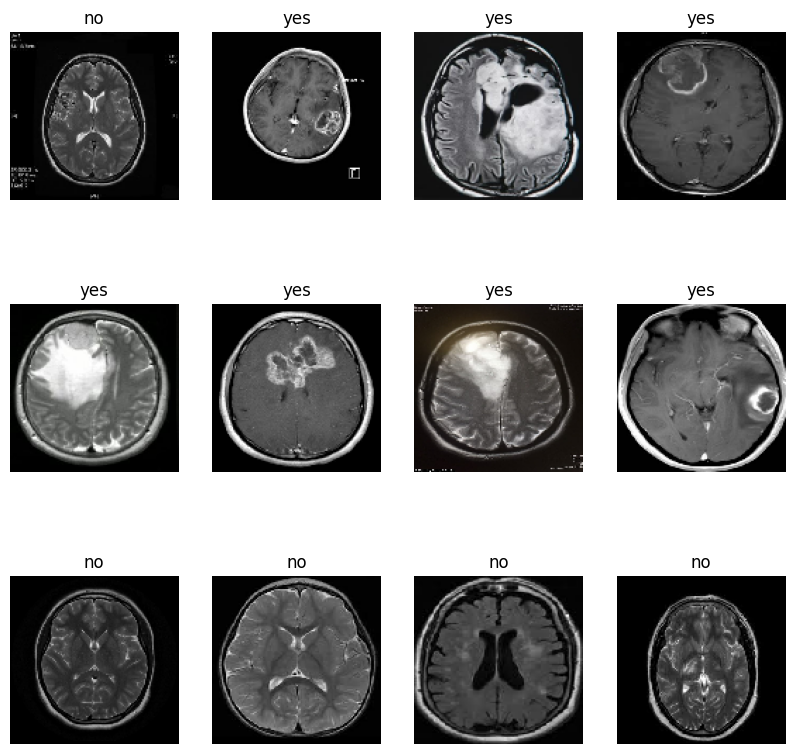

In [50]:
# print data set
plt.figure(figsize=(10,10))

for image, label in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    # plt.imshow(image[i].numpy().astype("uint8"))
    plt.imshow(image[i].numpy().astype("uint8"))
    # print(label)
    # label = int(label)
    # print(label)
    plt.title(class_name[int(label[i])])
    plt.axis("off")



In [18]:
train_data.shape

AttributeError: ignored